In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt

# Normalization techniques

In [4]:
# define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and standard deviation for MNIST
])

# download the complete MNIST data set
full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# split the data set into training and validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# create a test data set
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# determine the batch size
batch_size = 64

# create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Number of batches in train_loader: {len(train_loader)}")

Train set size: 48000
Validation set size: 12000
Test set size: 10000
Number of batches in train_loader: 750


In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [22]:
# no regularization

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 20

train_losses = []
train_accs = []

val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100. * train_correct / train_total
    
    train_losses.append(train_loss)
    train_accs.append(train_accuracy)

    # validation step
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100. * val_correct / val_total
    
    val_losses.append(val_loss)
    val_accs.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
    print('-' * 50)

Epoch [1/20]
Train Loss: 0.2154, Train Accuracy: 93.50%
Val Loss: 0.1303, Val Accuracy: 96.31%
--------------------------------------------------
Epoch [2/20]
Train Loss: 0.0932, Train Accuracy: 97.02%
Val Loss: 0.1261, Val Accuracy: 96.28%
--------------------------------------------------
Epoch [3/20]
Train Loss: 0.0645, Train Accuracy: 98.03%
Val Loss: 0.1004, Val Accuracy: 97.28%
--------------------------------------------------
Epoch [4/20]
Train Loss: 0.0498, Train Accuracy: 98.30%
Val Loss: 0.0931, Val Accuracy: 97.50%
--------------------------------------------------
Epoch [5/20]
Train Loss: 0.0394, Train Accuracy: 98.73%
Val Loss: 0.1126, Val Accuracy: 96.90%
--------------------------------------------------
Epoch [6/20]
Train Loss: 0.0365, Train Accuracy: 98.79%
Val Loss: 0.1200, Val Accuracy: 97.17%
--------------------------------------------------
Epoch [7/20]
Train Loss: 0.0304, Train Accuracy: 99.03%
Val Loss: 0.1031, Val Accuracy: 97.48%
-----------------------------

In [16]:
def visualize_training_history(train_losses, train_accs, val_losses, val_accs):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_accs, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

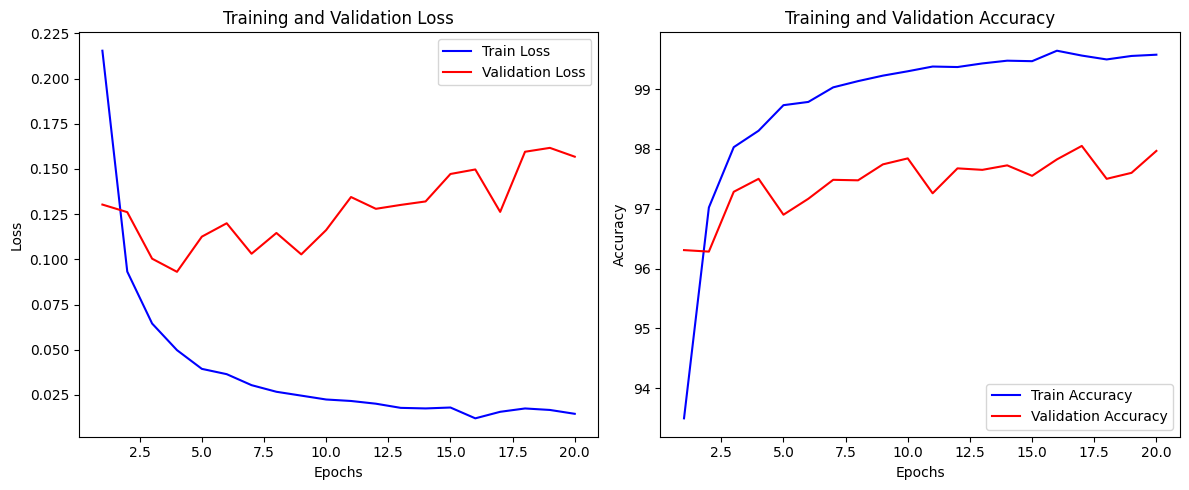

In [23]:
visualize_training_history(train_losses, train_accs, val_losses, val_accs)

Epoch [1/20]
Train Loss: 0.2251, Train Accuracy: 93.18%
Val Loss: 0.1377, Val Accuracy: 95.81%
--------------------------------------------------
Epoch [2/20]
Train Loss: 0.1143, Train Accuracy: 96.47%
Val Loss: 0.1388, Val Accuracy: 95.72%
--------------------------------------------------
Epoch [3/20]
Train Loss: 0.0934, Train Accuracy: 97.12%
Val Loss: 0.1279, Val Accuracy: 96.07%
--------------------------------------------------
Epoch [4/20]
Train Loss: 0.0811, Train Accuracy: 97.46%
Val Loss: 0.1285, Val Accuracy: 96.17%
--------------------------------------------------
Epoch [5/20]
Train Loss: 0.0738, Train Accuracy: 97.64%
Val Loss: 0.1250, Val Accuracy: 96.22%
--------------------------------------------------
Epoch [6/20]
Train Loss: 0.0672, Train Accuracy: 97.92%
Val Loss: 0.0998, Val Accuracy: 97.00%
--------------------------------------------------
Epoch [7/20]
Train Loss: 0.0624, Train Accuracy: 98.05%
Val Loss: 0.0905, Val Accuracy: 97.25%
-----------------------------

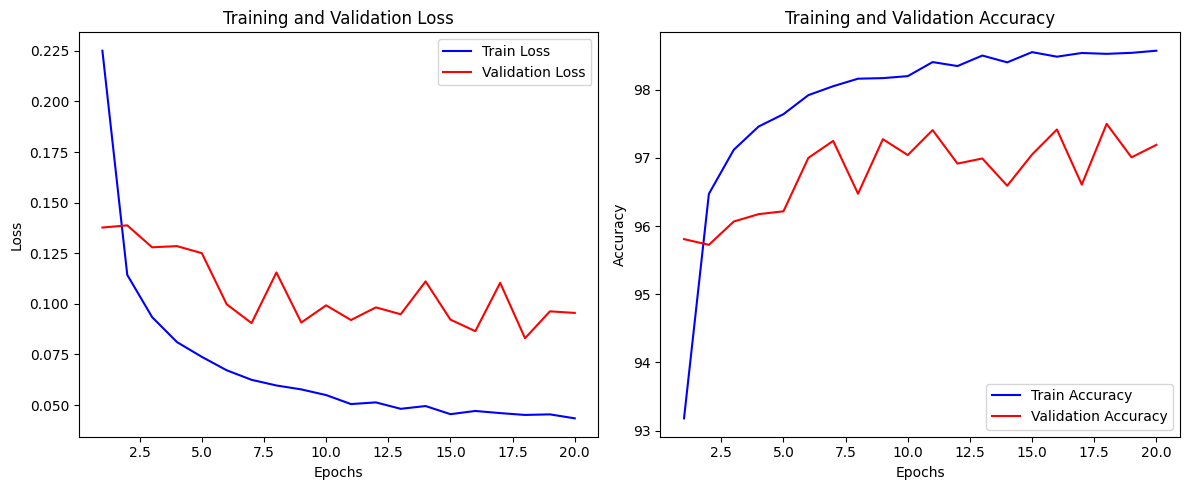

In [26]:
# L2 regularization

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-3)

num_epochs = 20

train_losses = []
train_accs = []

val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100. * train_correct / train_total
    
    train_losses.append(train_loss)
    train_accs.append(train_accuracy)

    # validation step
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100. * val_correct / val_total
    
    val_losses.append(val_loss)
    val_accs.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
    print('-' * 50)
    
visualize_training_history(train_losses, train_accs, val_losses, val_accs)

In [27]:
# early stopping

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
best_val_loss = float('inf')
patience = 2
counter = 0

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(20):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()
    
    train_loss /= len(train_loader)
    train_acc = 100. * train_correct / train_total
    
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            val_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = 100. * val_correct / val_total
    
    # save results
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

Epoch 0: Train Loss: 0.2135, Train Acc: 93.56%, Val Loss: 0.1490, Val Acc: 95.60%
Epoch 1: Train Loss: 0.0922, Train Acc: 97.20%, Val Loss: 0.0948, Val Acc: 97.16%
Epoch 2: Train Loss: 0.0640, Train Acc: 97.96%, Val Loss: 0.0895, Val Acc: 97.62%
Epoch 3: Train Loss: 0.0487, Train Acc: 98.44%, Val Loss: 0.1044, Val Acc: 97.05%
Epoch 4: Train Loss: 0.0437, Train Acc: 98.53%, Val Loss: 0.0954, Val Acc: 97.58%
Early stopping at epoch 4


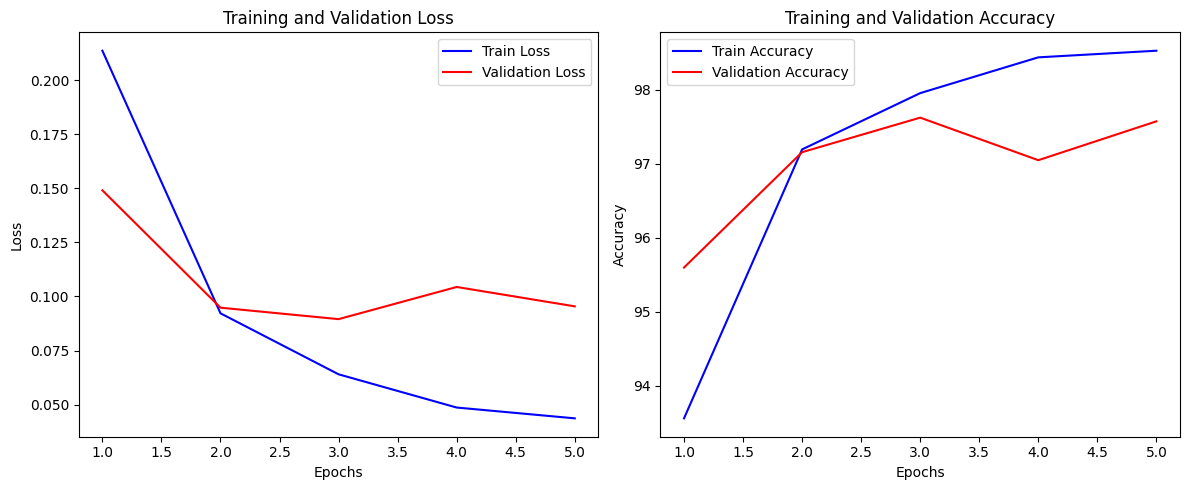

In [28]:
visualize_training_history(train_losses, train_accs, val_losses, val_accs)

In [29]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 512)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

In [30]:
# dropout

model = NetWithDropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(20):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()
    
    train_loss /= len(train_loader)
    train_acc = 100. * train_correct / train_total
    
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            val_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = 100. * val_correct / val_total
    
    # save results
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

Epoch 0: Train Loss: 0.2505, Train Acc: 92.30%, Val Loss: 0.1408, Val Acc: 95.76%
Epoch 1: Train Loss: 0.1178, Train Acc: 96.35%, Val Loss: 0.1289, Val Acc: 96.37%
Epoch 2: Train Loss: 0.0927, Train Acc: 97.06%, Val Loss: 0.1023, Val Acc: 97.01%
Epoch 3: Train Loss: 0.0762, Train Acc: 97.60%, Val Loss: 0.0961, Val Acc: 97.33%
Epoch 4: Train Loss: 0.0663, Train Acc: 97.86%, Val Loss: 0.0895, Val Acc: 97.69%
Epoch 5: Train Loss: 0.0620, Train Acc: 97.98%, Val Loss: 0.1082, Val Acc: 97.24%
Epoch 6: Train Loss: 0.0521, Train Acc: 98.33%, Val Loss: 0.0868, Val Acc: 97.91%
Epoch 7: Train Loss: 0.0512, Train Acc: 98.39%, Val Loss: 0.1166, Val Acc: 97.35%
Epoch 8: Train Loss: 0.0470, Train Acc: 98.56%, Val Loss: 0.1030, Val Acc: 97.42%
Epoch 9: Train Loss: 0.0450, Train Acc: 98.59%, Val Loss: 0.0933, Val Acc: 97.90%
Epoch 10: Train Loss: 0.0403, Train Acc: 98.76%, Val Loss: 0.0912, Val Acc: 97.99%
Epoch 11: Train Loss: 0.0402, Train Acc: 98.69%, Val Loss: 0.1043, Val Acc: 97.58%
Epoch 12: Trai

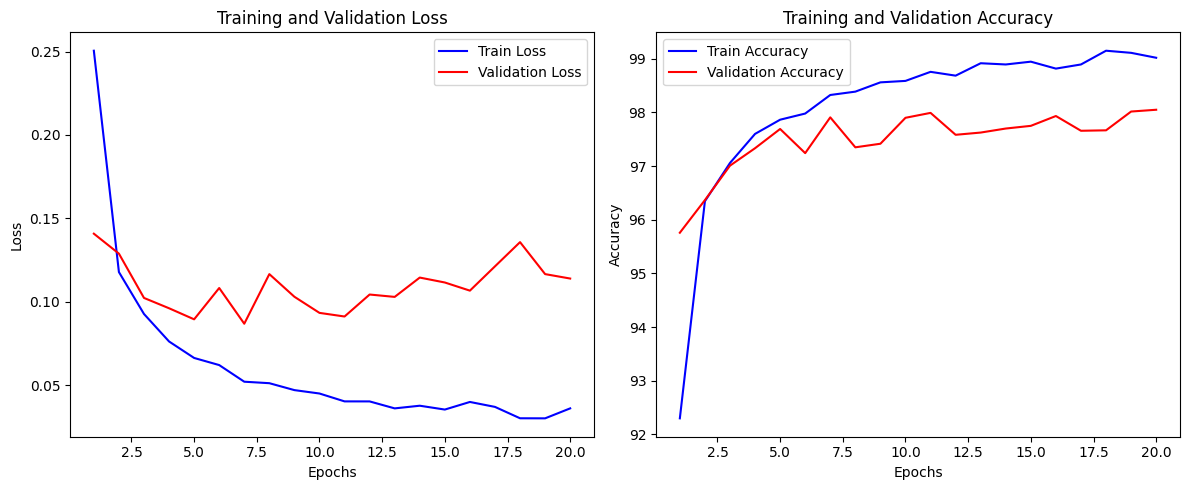

In [31]:
visualize_training_history(train_losses, train_accs, val_losses, val_accs)

In [32]:
class NetWithBN(nn.Module):
    def __init__(self):
        super(NetWithBN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        return self.fc3(x)

Epoch 0: Train Loss: 0.2082, Train Acc: 93.84%, Val Loss: 0.1105, Val Acc: 96.75%
Epoch 1: Train Loss: 0.0872, Train Acc: 97.30%, Val Loss: 0.0936, Val Acc: 97.26%
Epoch 2: Train Loss: 0.0604, Train Acc: 98.07%, Val Loss: 0.0763, Val Acc: 97.79%
Epoch 3: Train Loss: 0.0463, Train Acc: 98.56%, Val Loss: 0.0757, Val Acc: 97.77%
Epoch 4: Train Loss: 0.0349, Train Acc: 98.86%, Val Loss: 0.0854, Val Acc: 97.40%
Epoch 5: Train Loss: 0.0332, Train Acc: 98.86%, Val Loss: 0.0824, Val Acc: 97.66%
Epoch 6: Train Loss: 0.0257, Train Acc: 99.11%, Val Loss: 0.0916, Val Acc: 97.51%
Epoch 7: Train Loss: 0.0221, Train Acc: 99.28%, Val Loss: 0.0911, Val Acc: 97.70%
Epoch 8: Train Loss: 0.0217, Train Acc: 99.30%, Val Loss: 0.0835, Val Acc: 97.80%
Epoch 9: Train Loss: 0.0197, Train Acc: 99.33%, Val Loss: 0.0794, Val Acc: 97.99%
Epoch 10: Train Loss: 0.0163, Train Acc: 99.45%, Val Loss: 0.0803, Val Acc: 98.07%
Epoch 11: Train Loss: 0.0131, Train Acc: 99.56%, Val Loss: 0.1005, Val Acc: 97.57%
Epoch 12: Trai

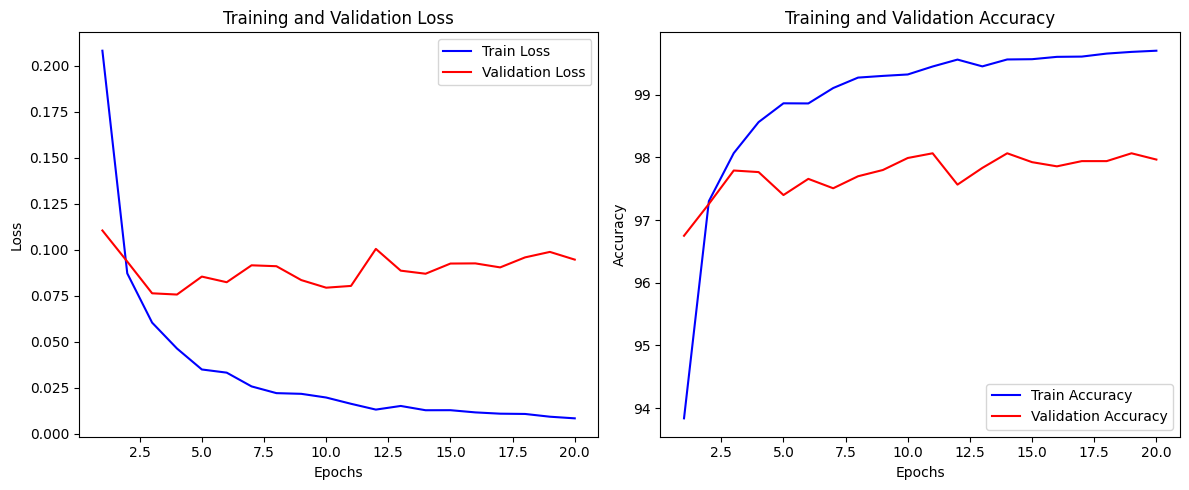

In [33]:
# BN

model = NetWithBN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(20):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()
    
    train_loss /= len(train_loader)
    train_acc = 100. * train_correct / train_total
    
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            val_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = 100. * val_correct / val_total
    
    # save results
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    
visualize_training_history(train_losses, train_accs, val_losses, val_accs)

# Hyperparameter optimization

In [37]:
import optuna

In [43]:
class Net(nn.Module):
    def __init__(self, dropout_rate, use_batchnorm):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(dropout_rate)
        self.use_batchnorm = use_batchnorm
        if use_batchnorm:
            self.bn1 = nn.BatchNorm1d(512)
            self.bn2 = nn.BatchNorm1d(512)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout(x)
        return self.fc3(x)

In [44]:
def objective(trial):
    # determine hyperparameters for optimization
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    use_batchnorm = trial.suggest_categorical('use_batchnorm', [True, False])
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    
    # create a model with selected hyperparameters
    model = Net(dropout_rate, use_batchnorm)
    
    # training settings
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # model training
    model.train()
    for epoch in range(10):  # let's limit it to 10 epochs for speed
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
        # Early stopping
        if epoch > 2 and loss.item() > prev_loss:
            break
        prev_loss = loss.item()
    
    # model evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in DataLoader(test_dataset, batch_size=1000):
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = correct / total
    return accuracy

In [45]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-07-28 16:53:41,561] A new study created in memory with name: no-name-7326afed-ff28-4cbc-b1d1-d8f8aab431a2
[I 2024-07-28 16:54:14,884] Trial 0 finished with value: 0.9702 and parameters: {'lr': 0.0012218516738057028, 'dropout_rate': 0.38761298424641366, 'use_batchnorm': False, 'batch_size': 64}. Best is trial 0 with value: 0.9702.
[I 2024-07-28 16:54:52,842] Trial 1 finished with value: 0.9775 and parameters: {'lr': 0.01438829991854348, 'dropout_rate': 0.4819743702394462, 'use_batchnorm': True, 'batch_size': 256}. Best is trial 1 with value: 0.9775.
[I 2024-07-28 16:55:18,847] Trial 2 finished with value: 0.9623 and parameters: {'lr': 3.669154047758939e-05, 'dropout_rate': 0.23865209241174312, 'use_batchnorm': True, 'batch_size': 64}. Best is trial 1 with value: 0.9775.
[I 2024-07-28 16:55:54,174] Trial 3 finished with value: 0.9694 and parameters: {'lr': 0.0011622839633504947, 'dropout_rate': 0.20221052057138125, 'use_batchnorm': False, 'batch_size': 32}. Best is trial 1 with v

[I 2024-07-28 17:13:25,967] Trial 34 finished with value: 0.9805 and parameters: {'lr': 0.0007412303357177915, 'dropout_rate': 0.3607114843487548, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:14:13,104] Trial 35 finished with value: 0.9796 and parameters: {'lr': 0.00025708562764821524, 'dropout_rate': 0.3561204462372429, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:14:48,590] Trial 36 finished with value: 0.9762 and parameters: {'lr': 0.00025949762741893476, 'dropout_rate': 0.31521983333414283, 'use_batchnorm': False, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:16:21,058] Trial 37 finished with value: 0.9816 and parameters: {'lr': 0.0015548553955471388, 'dropout_rate': 0.36244473971828556, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:16:57,326] Trial 38 finished with value: 0.9774 and parameters: {'lr': 0.0

[I 2024-07-28 17:36:50,880] Trial 69 finished with value: 0.9792 and parameters: {'lr': 0.0005876943791663871, 'dropout_rate': 0.3781105920665896, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:37:12,435] Trial 70 finished with value: 0.9787 and parameters: {'lr': 0.0019222321472929038, 'dropout_rate': 0.4384951774268501, 'use_batchnorm': True, 'batch_size': 256}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:37:52,004] Trial 71 finished with value: 0.9794 and parameters: {'lr': 0.0002190902526770329, 'dropout_rate': 0.3567234021091593, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:38:31,475] Trial 72 finished with value: 0.9793 and parameters: {'lr': 0.00032055875745489956, 'dropout_rate': 0.33724918557727523, 'use_batchnorm': True, 'batch_size': 32}. Best is trial 22 with value: 0.9816.
[I 2024-07-28 17:39:11,651] Trial 73 finished with value: 0.9793 and parameters: {'lr': 0.000

Number of finished trials: 100
Best trial:
  Value:  0.9826
  Params: 
    lr: 0.0006988109922201878
    dropout_rate: 0.3771853219519784
    use_batchnorm: True
    batch_size: 32


/tmp/ipykernel_8080/3302522744.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 1000x600 with 0 Axes>

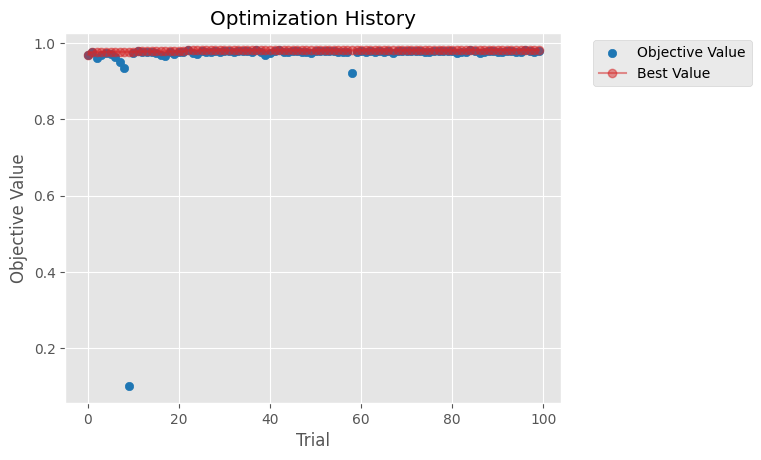

In [46]:
# 1. Optimization history plot
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optimization History")
plt.show()

/tmp/ipykernel_8080/2854606975.py:3: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 1000x600 with 0 Axes>

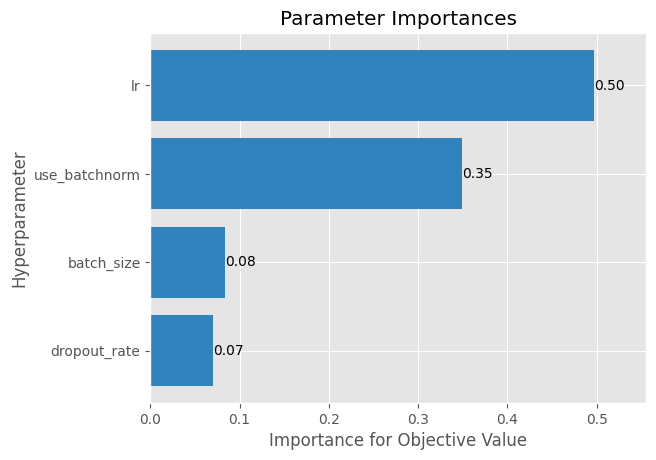

In [47]:
# 2. Parameter importance plot
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title("Parameter Importances")
plt.show()

/tmp/ipykernel_8080/4239929850.py:3: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(study)


<Figure size 1000x600 with 0 Axes>

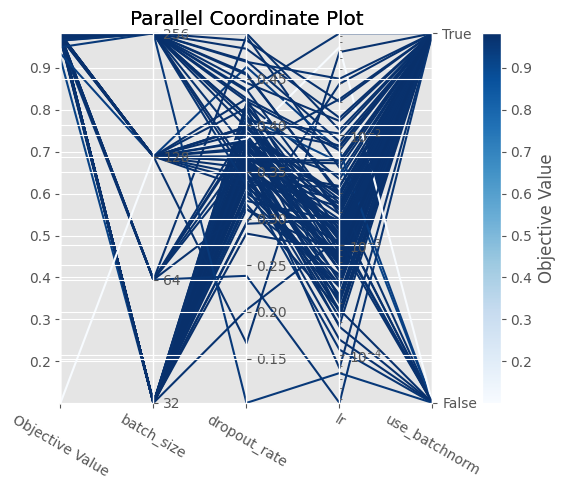

In [48]:
# 3. Parameters interaction plot
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_parallel_coordinate(study)
plt.title("Parallel Coordinate Plot")
plt.show()

/tmp/ipykernel_8080/2928570007.py:3: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)


<Figure size 1000x600 with 0 Axes>

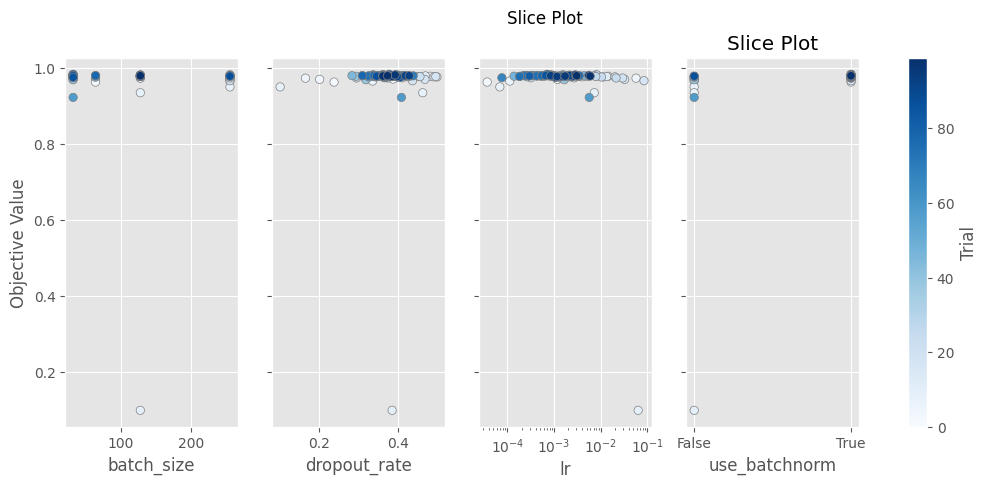

In [49]:
# 4. Parameter value distribution plot
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_slice(study)
plt.title("Slice Plot")
plt.show()

In [50]:
# 5. Interactive optimization plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [51]:
# 6. Interactive parameter importance plot
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [52]:
# 7. Interactive interaction of parameters plot
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [53]:
# 8. Interactive parameter value distribution plot
fig = optuna.visualization.plot_slice(study)
fig.show()